In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
train_data = pd.read_csv('../files/titanic_train.csv')
test_data = pd.read_csv('../files/titanic_test.csv')

In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

<AxesSubplot:>

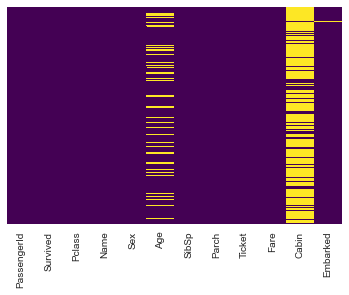

In [5]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

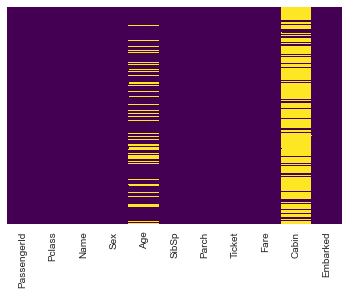

In [6]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Data Cleaning


In [7]:
# What the function below is doing is that it is filling the missing age with the average for the passenger class that person belongs to.
# The averages are gotten from the boxplot above.
def impute_age(cols):#My function accepts two columns(cols)
    Age = cols[0]#column at index 0
    Pclass = cols[1]#column at index 1
    
    if pd.isnull(Age): #If the Age column is null (pd.isnull is a pandas method)

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

In [9]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)

In [11]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [12]:
# Drop the cabin column since there are too much missing info
train_data.drop('Cabin',axis=1,inplace=True)

In [13]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
# Drop the cabin column since there are too much missing info
test_data.drop('Cabin',axis=1,inplace=True)

In [15]:
# Since the embarked column has only one missing value, we can just drop that value. It won't have significant effect

train_data.dropna(inplace=True)

In [16]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [17]:
# Since the embarked column has only one missing value, we can just drop that value. It won't have significant effect

test_data.dropna(inplace=True)

In [18]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [19]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)
# Drop the old columns Sex, Embarked which we don't need again and the Name, Tickets columns which our algorithm wouldn't need.
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
train_data.reset_index(drop=True, inplace=True)
sex.reset_index(drop=True, inplace=True)
embark.reset_index(drop=True, inplace=True)

In [26]:
train_data = pd.concat([train_data,sex,embark],axis=1)

In [27]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,NaN,NaN,NaN,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,NaN,NaN,NaN,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,NaN,NaN,NaN,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,NaN,NaN,NaN,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,NaN,NaN,NaN,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN
2663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN
2664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN
2665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [21]:
sex_test = pd.get_dummies(test_data['Sex'],drop_first=True)
embark_test = pd.get_dummies(test_data['Embarked'],drop_first=True)
# Drop the old columns Sex, Embarked which we don't need again and the Name, Tickets columns which our algorithm wouldn't need.
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [22]:
test_data = pd.concat([test_data,sex_test,embark_test],axis=1)

In [23]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,NaN,NaN,NaN
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,NaN,NaN,NaN
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,NaN,NaN,NaN
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,NaN,NaN,NaN
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [19]:
train_data.drop('PassengerId', axis=1, inplace=True)
# Since the passengerid column is just a serial number column, it holds no significant predictive power so we drop it too

In [20]:
test_data.drop('PassengerId', axis=1, inplace=True)
# Since the passengerid column is just a serial number column, it holds no significant predictive power so we drop it too

# Building a Logistic Regression model

Training data

In [23]:
from sklearn.model_selection import train_test_split

In [27]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,1.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,NaN,NaN,NaN
887,1.0,1.0,19.0,0.0,0.0,30.0000,NaN,NaN,NaN
888,0.0,3.0,24.0,1.0,2.0,23.4500,NaN,NaN,NaN
889,1.0,1.0,26.0,0.0,0.0,30.0000,NaN,NaN,NaN


In [24]:
X=train_data.drop('Survived', axis=1)
y= train_data['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Testing data

In [26]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
489,3.0,9.0,1.0,1.0,15.9000,NaN,NaN,NaN
677,3.0,18.0,0.0,0.0,9.8417,NaN,NaN,NaN
562,2.0,28.0,0.0,0.0,13.5000,NaN,NaN,NaN
2,3.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0
690,1.0,31.0,1.0,0.0,57.0000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
575,3.0,19.0,0.0,0.0,14.5000,NaN,NaN,NaN
839,1.0,37.0,0.0,0.0,29.7000,NaN,NaN,NaN
337,1.0,41.0,0.0,0.0,134.5000,1.0,0.0,0.0
523,1.0,44.0,0.0,1.0,57.9792,NaN,NaN,NaN


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
logmod = LinearRegression()

In [28]:
logmod.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predictions = logmod.predict(X_test)

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report())